In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sample=pd.read_csv('sample_submission.csv')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

In [9]:
pd.set_option('display.max_columns',None)
train.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [23]:
nums_cols=train.select_dtypes(include=np.number).columns.to_list()

cat_cols=train.select_dtypes(include=['object','bool']).columns.tolist()

print(cat_cols)

cat_cols=train.select_dtypes(exclude=np.number).columns.tolist()

print(nums_cols)


['road_type', 'lighting', 'weather', 'road_signs_present', 'public_road', 'time_of_day', 'holiday', 'school_season']
['id', 'num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents', 'accident_risk']


In [24]:
nums_cols.remove('id')

In [25]:

for i in cat_cols:
  print(train[i].value_counts())

road_type
highway    173672
rural      172719
urban      171363
Name: count, dtype: int64
lighting
dim         183826
daylight    178015
night       155913
Name: count, dtype: int64
weather
foggy    181463
clear    179306
rainy    156985
Name: count, dtype: int64
road_signs_present
False    259289
True     258465
Name: count, dtype: int64
public_road
True     260045
False    257709
Name: count, dtype: int64
time_of_day
morning      173410
evening      172837
afternoon    171507
Name: count, dtype: int64
holiday
True     260688
False    257066
Name: count, dtype: int64
school_season
False    260164
True     257590
Name: count, dtype: int64


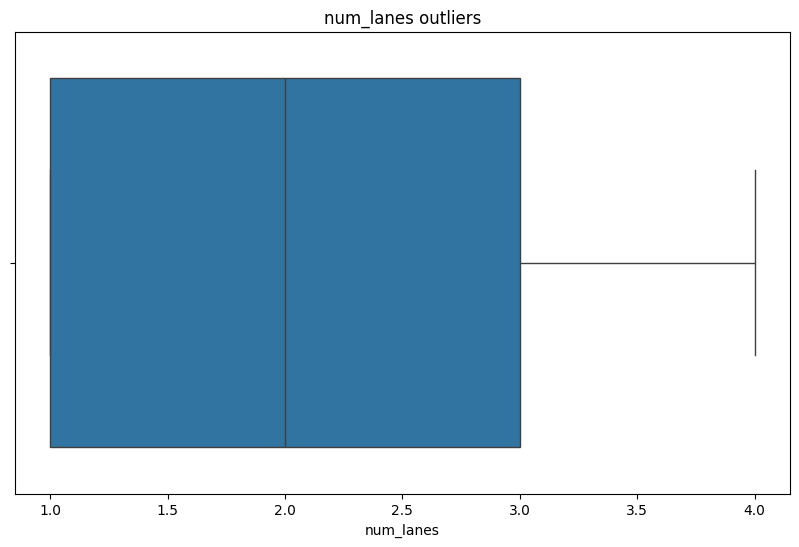

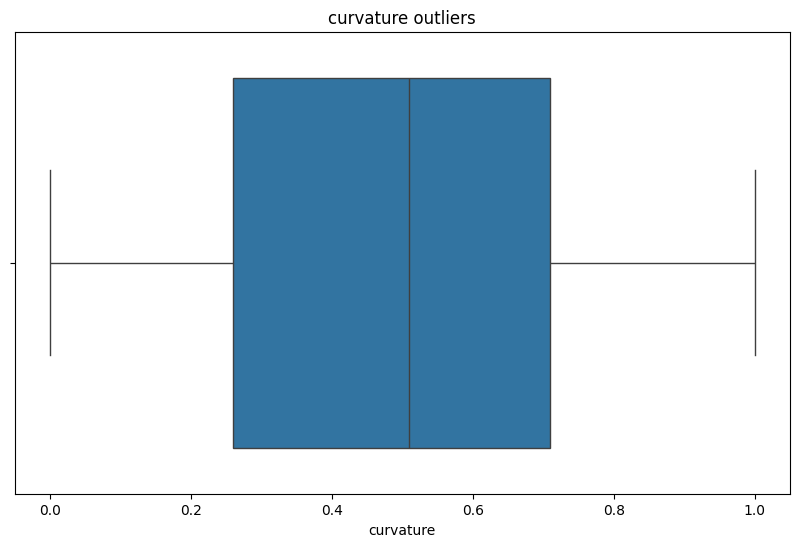

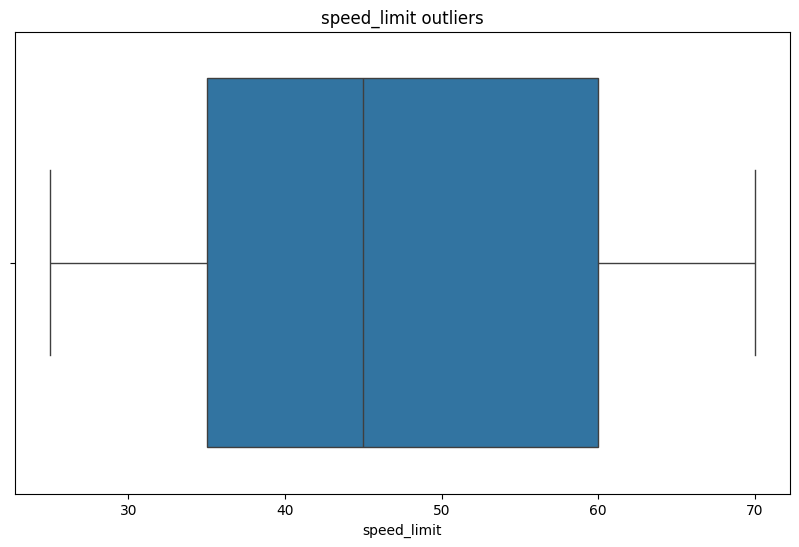

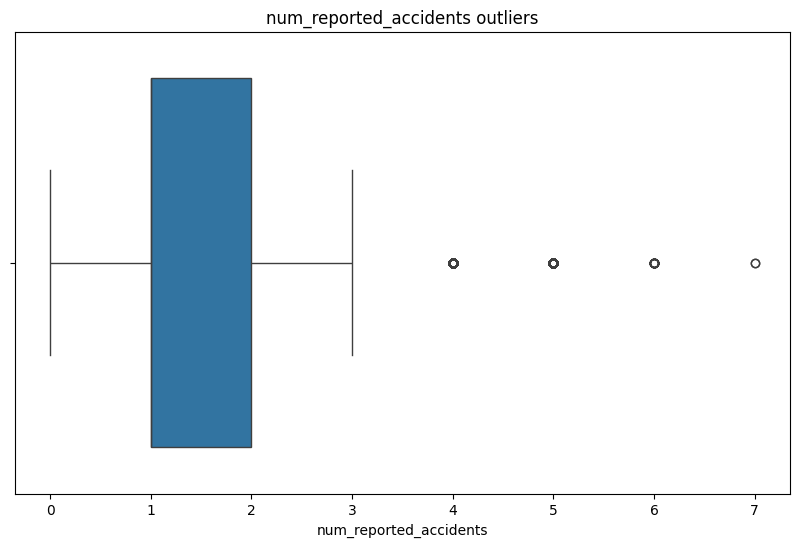

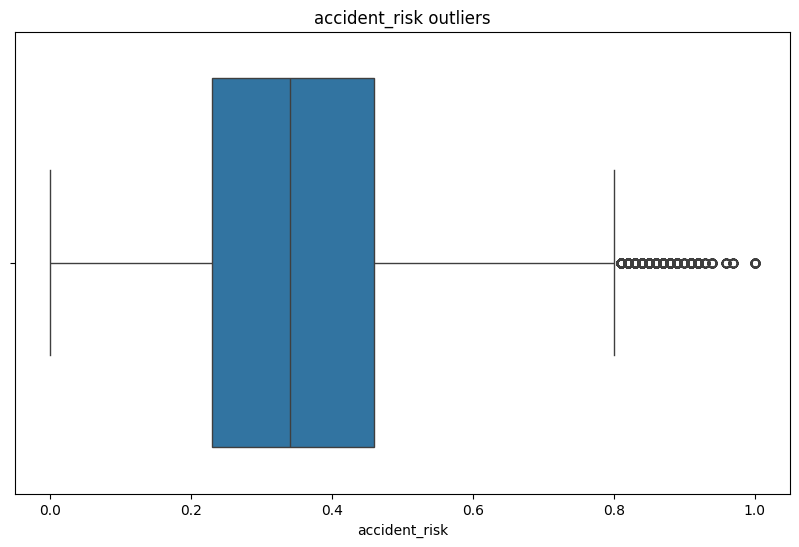

In [26]:
for i in nums_cols:
  plt.figure(figsize=(10,6))
  sns.boxplot(x=train[i])
  plt.title(f"{i} outliers")
  plt.show()

In [31]:
from sklearn.preprocessing import OrdinalEncoder
OrdinalEncoder=OrdinalEncoder()
for i in cat_cols:
  train[i]=OrdinalEncoder.fit_transform(train[[i]])
  test[i]=OrdinalEncoder.transform(test[[i]])

train.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,2.0,2,0.06,35,0.0,2.0,0.0,1.0,0.0,0.0,1.0,1,0.13
1,2.0,4,0.99,35,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0,0.35
2,1.0,4,0.63,70,1.0,0.0,0.0,1.0,2.0,1.0,0.0,2,0.30
3,0.0,4,0.07,35,1.0,2.0,1.0,1.0,2.0,0.0,0.0,1,0.21
4,1.0,1,0.58,60,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1,0.56


In [32]:
nums_cols.remove('accident_risk')

In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
for i in nums_cols:
  train[i]=scaler.fit_transform(train[[i]])
  test[i]=scaler.transform(test[[i]])

In [34]:
X=train.drop('accident_risk',axis=1) #inplace true than remove the column from the train data also

y=train['accident_risk']

In [35]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def test_regression_model(X_train, X_test, y_train, y_test):
    models = {
        'LinearRegression': LinearRegression(),
        'Lasso': Lasso(),
        'Ridge': Ridge(),
        'ElasticNet': ElasticNet(),
        'DecisionTreeRegressor': DecisionTreeRegressor(),
        'KNeighborsRegressor': KNeighborsRegressor(),
        'RandomForestRegressor': RandomForestRegressor(),
        'GradientBoostingRegressor': GradientBoostingRegressor(),
        'AdaBoostRegressor': AdaBoostRegressor(),
        'XGBoost': XGBRegressor(verbosity=0),
        'CatBoostRegressor': CatBoostRegressor(verbose=False),
        'LGBMRegressor': LGBMRegressor()
    }

    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        results.append({
            'Model Name': name,
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R2 Score': r2
        })

    return pd.DataFrame(results).sort_values(by='R2 Score', ascending=False).reset_index(drop=True)

df_results = test_regression_model(X_train, X_test, y_train, y_test)

df_results

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015923 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 12
[LightGBM] [Info] Start training from score 0.352605


,Model Name,MAE,MSE,RMSE,R2 Score
0,CatBoostRegressor,0.043671,0.003162,0.056234,0.885475
1,XGBoost,0.043702,0.003169,0.056297,0.885218
2,LGBMRegressor,0.043755,0.003176,0.056356,0.884978
3,GradientBoostingRegressor,0.044369,0.003254,0.057041,0.882167
4,RandomForestRegressor,0.046180,0.003543,0.059522,0.871690
5,KNeighborsRegressor,0.051474,0.004381,0.066189,0.841338
6,DecisionTreeRegressor,0.064071,0.006938,0.083293,0.748741
7,Ridge,0.070809,0.007822,0.088444,0.716707
8,LinearRegression,0.070809,0.007822,0.088444,0.716707
9,AdaBoostRegressor,0.071572,0.008119,0.090103,0.705979


In [37]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.1 MB/s eta 0:00:00
